# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [25]:
# Loading in required libraries: you will need pandas, seaborn and numpy
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Reading in the Nobel Prize data
nobel =  pd.read_csv("datasets/nobel.csv")

# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...
nobel.info()

print('#SECTION COMMENT: THE DATASET ON NOBEL PIECE PRIZE IS VERY LARGE, AND HAS A NUMBER OF MISSING DATA. IN THE DATA SET WE HAVE 911 ENTRIES WITH A NUMBER OF 18 COLUMNS')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB
#SECTION COMMENT: THE DATASET ON NOBEL PIECE PRIZE I

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [26]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
print('Number of possibly shared:',len(nobel[nobel.organization_country.isnull()]))

# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
a=pd.DataFrame(nobel.groupby('sex').size()).reset_index()
b=a.rename(columns={0:"Total"})
print(b)


Number of possibly shared: 244
      sex  Total
0  Female     49
1    Male    836


In [27]:
# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
print('Top 10 Countries')
top_10=pd.DataFrame(nobel['birth_country'].value_counts()[:10]).reset_index()
top_10=top_10.rename(columns={"index":"Birth Country", "birth_country":"Total"})
print(top_10)      
print('#SECTION COMMENT: PRIZES THAT ARE POSSIBLY SHARED ARE 244. MEN WIN MORE THAN FEMALE, IN A RATION OF 1:17 THIS CAN ALSO BE INTERPRETED TO SAY THAT FOR EVERY FEMALE WINNER THERE ARE 17 MEN WHO ALSO WIN. THE TABLE SHOWS THE TOP 10 COUNTRIES THAT WIN THE MOST RANKING THEM IN ORDER OF MOST TO LEAST WINS')

Top 10 Countries
              Birth Country  Total
0  United States of America    259
1            United Kingdom     85
2                   Germany     61
3                    France     51
4                    Sweden     29
5                     Japan     24
6               Netherlands     18
7                    Canada     18
8                    Russia     17
9                     Italy     17
#SECTION COMMENT: PRIZES THAT ARE POSSIBLY SHARED ARE 244. MEN WIN MORE THAN FEMALE, IN A RATION OF 1:17 THIS CAN ALSO BE INTERPRETED TO SAY THAT FOR EVERY FEMALE WINNER THERE ARE 17 MEN WHO ALSO WIN. THE TABLE SHOWS THE TOP 10 COUNTRIES THAT WIN THE MOST RANKING THEM IN ORDER OF MOST TO LEAST WINS


Which countries win most often?

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [28]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel.birth_country=='United States of America'
nobel['decade'] = nobel['year'].apply(lambda year: year-(year%10))
prop_usa_winners = nobel.usa_born_winner.mean()
nobel['usa_prop']=prop_usa_winners
print(prop_usa_winners)

0.2843029637760702


In [39]:
# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
print('Total Dominance by USA:', prop_usa_winners)

usa_per_decade= nobel.usa_born_winner.groupby(nobel.decade).mean()
usa_per_decade= usa_per_decade.to_frame('proportion')

usa_per_decade['decade']= usa_per_decade.index
usa_per_decade= usa_per_decade.reset_index(drop=True)
#usa_per_decade.drop_index()

print(type(usa_per_decade))
print(usa_per_decade)

Total Dominance by USA: 0.2843029637760702
<class 'pandas.core.frame.DataFrame'>
    proportion  decade
0     0.017544    1900
1     0.075000    1910
2     0.074074    1920
3     0.250000    1930
4     0.302326    1940
5     0.291667    1950
6     0.265823    1960
7     0.317308    1970
8     0.319588    1980
9     0.403846    1990
10    0.422764    2000
11    0.292683    2010


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

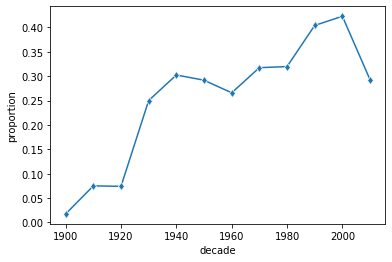

In [54]:
#using seaborn, plot the proportion of US winners by decade
sns.lineplot('decade', 'proportion', data= usa_per_decade, marker='d')

What can you conclude from the graph?

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

In [85]:
nobel[nobel.sex=='Female']

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,usa_prop,female_winner,age
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,1934-07-04,Sallanches,France,False,1900,0.284303,1903,36.0
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,...,NaN,NaN,1914-06-21,Vienna,Austria,False,1900,0.284303,1905,62.0
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,...,NaN,NaN,1940-03-16,Mårbacka,Sweden,False,1900,0.284303,1909,51.0
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Paris,France,1934-07-04,Sallanches,France,False,1910,0.284303,1911,44.0
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",...,NaN,NaN,1936-08-15,Rome,Italy,False,1920,0.284303,1926,55.0
141,1928,Literature,The Nobel Prize in Literature 1928,"""principally for her powerful descriptions of ...",1/1,601,Individual,Sigrid Undset,1882-05-20,Kalundborg,...,NaN,NaN,1949-06-10,Lillehammer,Norway,False,1920,0.284303,1928,46.0
160,1931,Peace,The Nobel Peace Prize 1931,NaN,1/2,496,Individual,Jane Addams,1860-09-06,"Cedarville, IL",...,NaN,NaN,1935-05-21,"Chicago, IL",United States of America,True,1930,0.284303,1931,71.0
179,1935,Chemistry,The Nobel Prize in Chemistry 1935,"""in recognition of their synthesis of new radi...",1/2,194,Individual,Irène Joliot-Curie,1897-09-12,Paris,...,Paris,France,1956-03-17,Paris,France,False,1930,0.284303,1935,38.0
198,1938,Literature,The Nobel Prize in Literature 1938,"""for her rich and truly epic descriptions of p...",1/1,610,Individual,Pearl Buck,1892-06-26,"Hillsboro, WV",...,NaN,NaN,1973-03-06,"Danby, VT",United States of America,True,1930,0.284303,1938,46.0
218,1945,Literature,The Nobel Prize in Literature 1945,"""for her lyric poetry which, inspired by power...",1/1,615,Individual,Gabriela Mistral,1889-04-07,Vicuña,...,NaN,NaN,1957-01-10,"Hempstead, NY",United States of America,False,1940,0.284303,1945,56.0


In [86]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel[nobel.sex=='Female']
prop_female_winners = nobel['female_winner'].mean()

# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# ... YOUR CODE FOR TASK 5 ...
print('all time proportion of female winners: ',prop_female_winners)

prop_female_winners= nobel['female_winner'].groupby('category').mean()
prop_female_winners= prop_female_winners.to_frame('proportion')
prop_female_winners['decade']= prop_female_winners.index
prop_female_winners= prop_female_winners.reset_index(drop= True)

print(df_female_winners.head())

list_cats= prop_female_winners.category.unique()

for each in list_cats:
    print(prop_female_winners[prop_female_winners.category== each]).count()

#sns.lineplot(x='decade', y='proportion', data= prop_female_winners)

#df_female_winners.plot(x= 'decade', y='proportion')
dict_categories= prop_female_winners.category.unique()

for each in dict_categories:
    subject= prop_female_winners[prop_female_winners['category']== each]
    #plt.plot(x='decade', y='proportion', data=subject,label= each)
    #subject.plot(x='decade', y='proportion', label=each)
    sns.lineplot(x='decade', y='proportion', data=subject)
plt.figure(figsize=(12,8))
sns.lineplot(x='decade', y='proportion', hue='category' ,data=df_female_winners)

all time proportion of female winners:  year               1979.551020
laureate_id         614.183673
usa_born_winner       0.224490
decade             1974.489796
usa_prop              0.284303
female_winner      1979.551020
age                  58.000000
dtype: float64


AttributeError: 'DataFrame' object has no attribute 'to_frame'



```
# This is formatted as code
```

 Interpret your plot here

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [72]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...
first_woman= nobel.loc[(nobel.sex=='Female')].sort_values('year').head(1).full_name
print('The first woman to win was', first_woman.values)

The first woman to win was ['Marie Curie, née Sklodowska']


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [73]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...
times_won= nobel.full_name.value_counts()
times_won= nobel.full_name.value_counts()
print(times_won[times_won >=2])
print(times_won[times_won >1].count(), ' People won more than once.')

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
Marie Curie, née Sklodowska                                                          2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Name: full_name, dtype: int64
6  People won more than once.





How many people have received 2 or more prizes?

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

The average age for winners is:  59.453001132502834
The standard deviation is:  12.39929042786365
The median age is:  60.0


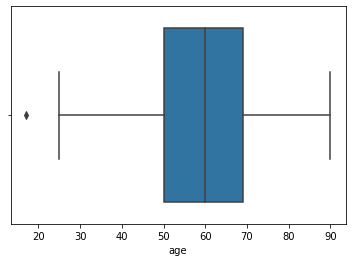

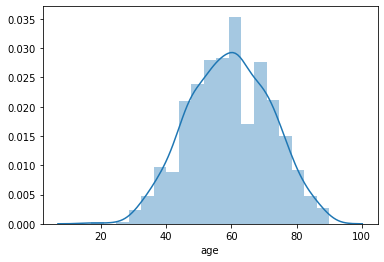

In [74]:
# Converting birth_date from String to datetime
from datetime import time
nobel['birth_date'] = pd.to_datetime(nobel.birth_date)

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel.year- nobel.birth_date.dt.year

# What is the mean age of winners and it's standard devation? What is the median age?
print('The average age for winners is: ',nobel.age.mean())
print('The standard deviation is: ', nobel.age.std())

print('The median age is: ', nobel.age.median())
sns.boxplot(x='age', data=nobel)
plt.show()
sns.distplot(nobel.age.dropna())

## 9. Age differences between prize categories


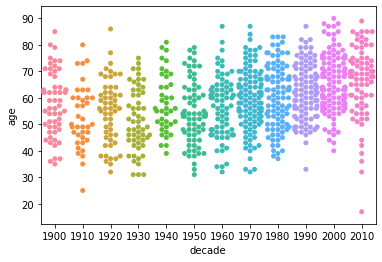

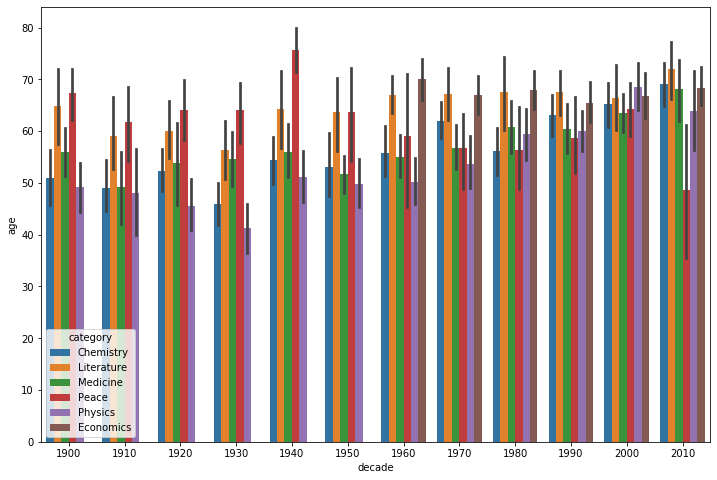

In [78]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...

sns.swarmplot(x='decade', y='age', data=nobel)
# Plot the age of nobel candidates by decade and prize category

#dict_categories= nobel.category.unique()
#plt.subplot(2, 3, 6)

plt.show()
plt.figure(figsize=(12,8))
#for each in range(len(dict_categories)):
#    sns.barplot(x='decade', y='age', hue='category', data=nobel, ax= axes[each])

sns.barplot(x='decade', y='age', hue='category', data=nobel)
#sns.catplot(x='decade', y='age', col='category', aspect=.6, data=nobel)


#sns.catplot(x='Q5',kind='count', col='Q16', aspect=.6, data=momible)
#sns.FacetGrid(data=nobel,row='decade', col='age', hue='category')
#sns.FacetGrid(data, row='Country', col='AgeGroup', hue='')


What can you conclude about the age at which people win different types of Nobel Prizes?

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

## Congratulations! You've reached the end of the challenge!